# 14章：演習問題の解答

In [1]:
%pip install -q japanize-matplotlib
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## 演習1

### (1)

In [2]:
rng = np.random.default_rng()

In [3]:
rng.integers(0, 2, size=10)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [4]:
rng.integers(1, 7, size=(3,5))

array([[1, 4, 4, 6, 6],
       [1, 1, 6, 3, 1],
       [5, 2, 3, 1, 5]])

### (2)

In [5]:
rng.integers(1, 7, size=(10,20))

array([[1, 1, 5, 4, 5, 4, 6, 5, 6, 4, 6, 1, 6, 3, 5, 1, 1, 2, 4, 1],
       [5, 3, 4, 6, 2, 2, 4, 3, 5, 3, 6, 5, 4, 2, 5, 2, 4, 6, 3, 2],
       [2, 1, 3, 2, 1, 2, 6, 4, 1, 6, 5, 1, 2, 3, 2, 3, 4, 6, 4, 3],
       [5, 1, 1, 4, 5, 5, 2, 5, 4, 5, 3, 6, 6, 1, 2, 6, 6, 1, 1, 4],
       [3, 5, 6, 3, 6, 3, 5, 3, 3, 1, 6, 5, 2, 5, 6, 1, 4, 4, 1, 3],
       [3, 3, 2, 1, 1, 4, 5, 6, 1, 4, 2, 5, 3, 6, 6, 4, 5, 3, 4, 6],
       [6, 2, 1, 2, 2, 4, 3, 6, 5, 5, 2, 2, 3, 1, 4, 2, 5, 5, 3, 3],
       [4, 2, 1, 2, 6, 6, 4, 3, 2, 1, 4, 4, 3, 1, 2, 3, 6, 2, 4, 6],
       [5, 2, 2, 2, 3, 4, 3, 3, 5, 4, 1, 4, 4, 2, 5, 6, 4, 2, 3, 2],
       [4, 3, 5, 3, 3, 5, 5, 2, 5, 3, 6, 6, 3, 6, 5, 4, 5, 6, 3, 3]])

### (3)

In [6]:
n, N = 30, 10_000
coins = rng.integers(0, 2, size=(n,N))

### (4)

In [7]:
avr = coins.mean(axis=0)

### (5)

In [8]:
s_avr = ( avr - 0.5 ) / (0.5/n**0.5)

### (6)

In [9]:
def clt(n=1000, N=100_000, seed=None):

    np.random.default_rng(seed)
    coins = rng.integers(0, 2, size=(n,N))
    avr = coins.mean(axis=0)
    s_avr = ( avr - 0.5 ) / (0.5/n**0.5)

    return s_avr

### (7)

In [10]:
res = clt()
res

array([ 1.13841996,  1.39140217, -1.20166551, ...,  1.26491106,
        0.37947332, -2.15034881])

### (8)

In [11]:
np.unique(s_avr)

array([-4.38178046, -4.01663209, -3.28633535, -2.92118697, -2.5560386 ,
       -2.19089023, -1.82574186, -1.46059349, -1.09544512, -0.73029674,
       -0.36514837,  0.        ,  0.36514837,  0.73029674,  1.09544512,
        1.46059349,  1.82574186,  2.19089023,  2.5560386 ,  2.92118697,
        3.28633535,  3.65148372])

### (9)

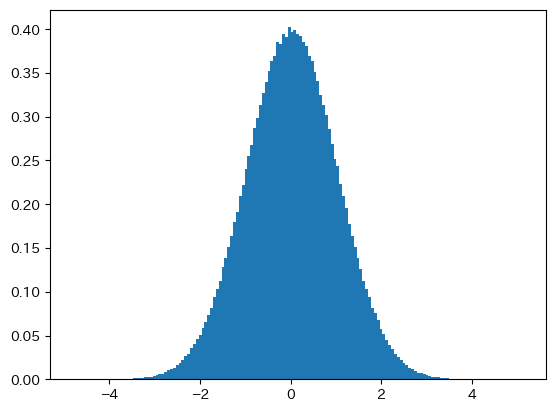

In [12]:
plt.hist(res, bins=np.unique(res), density=True)
plt.show()

## 演習2

### (1)

In [13]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np.arange(0, 11, 2)

array([ 0,  2,  4,  6,  8, 10])

In [15]:
np.arange(-3, 4)

array([-3, -2, -1,  0,  1,  2,  3])

### (2)

In [16]:
lst = list( range(10) )
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
np.cumsum(lst)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [18]:
arr = np.arange(1, 6)
arr

array([1, 2, 3, 4, 5])

In [19]:
np.cumsum(arr)

array([ 1,  3,  6, 10, 15])

### (3)

In [20]:
n = 100_000
coins = rng.integers(0, 2, size=n)            # 0または1をN個生成
cumulative_sum = np.cumsum(coins)             # coinsの累積和を計算
avr_arr = cumulative_sum / np.arange(1, n+1)  # 各回の試行での平均を計算

### (4)

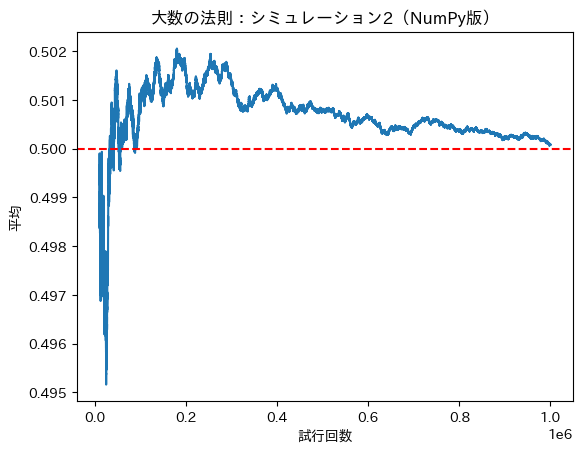

In [21]:
m = 10000   # 除外する個数
plt.plot(np.arange(1+m, n+1), avr_arr[m:])
plt.axhline(0.5, color="red", linestyle="--")
plt.xlabel("試行回数")
plt.ylabel("平均")
plt.title("大数の法則：シミュレーション2（NumPy版）")
plt.show()

### (5)

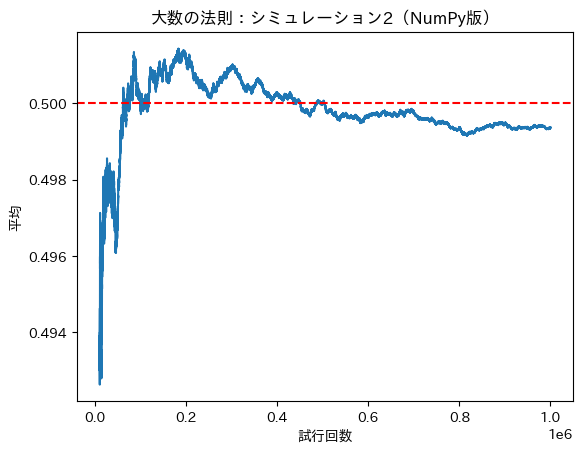

In [22]:
def lln(n=100_000, m=10_000, seed=None):

    if n-m >= 2:

        rng = np.random.default_rng(seed=123)

        coins = rng.integers(0, 2, size=n)
        cumulative_sum = np.cumsum(coins)
        avr_arr = cumulative_sum / np.arange(1, n+1)

        plt.plot(np.arange(1+m, n+1), avr_arr[m:])
        plt.axhline(0.5, color="red", linestyle="--")
        plt.xlabel("試行回数")
        plt.ylabel("平均")
        plt.title("大数の法則：シミュレーション2（NumPy版）")
        plt.show()

    else:
        print("n-m>=2となるように設定してください。")

lln()